<a href="https://colab.research.google.com/github/prateekkate/NLP/blob/main/TextClassification_PracticalNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np
import pandas as pd

import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import stop_words

#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import recall_score as rs  
from sklearn.metrics import precision_score as ps  
from sklearn.metrics import f1_score as fs  
from sklearn.metrics import balanced_accuracy_score as bas  
from sklearn.metrics import confusion_matrix as cm  
from sklearn.metrics import accuracy_score as acc

In [2]:
!wget -P DATAPATH https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
!ls -lah DATAPATH

--2021-05-27 06:01:06--  https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch4/Data/Full-Economic-News-DFE-839861.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12383529 (12M) [text/plain]
Saving to: ‘DATAPATH/Full-Economic-News-DFE-839861.csv.2’

Full-Economic-News- 100%[===================>]  11.81M  56.2MB/s    in 0.2s    

2021-05-27 06:01:06 (56.2 MB/s) - ‘DATAPATH/Full-Economic-News-DFE-839861.csv.2’ saved [12383529/12383529]

total 36M
drwxr-xr-x 2 root root 4.0K May 27 06:01 .
drwxr-xr-x 1 root root 4.0K May 27 05:35 ..
-rw-r--r-- 1 root root  12M May 27 05:35 Full-Economic-News-DFE-839861.csv
-rw-r--r-- 1 root root  12M May 27 05:59 Full-Economic-News-DFE-839861.csv.1
-rw-r--r-- 1 root root  12M May 27 06:01 Full-Economic-New

In [3]:
our_data = pd.read_csv("DATAPATH/Full-Economic-News-DFE-839861.csv" , encoding = "ISO-8859-1" )

display(our_data.shape) #Number of rows (instances) and columns in the dataset
our_data["relevance"].value_counts()/our_data.shape[0] #Class distribution in the dataset

(8000, 15)

no          0.821375
yes         0.177500
not sure    0.001125
Name: relevance, dtype: float64

In [4]:
our_data = our_data[our_data.relevance!='not sure']
our_data['relevance'] = our_data['relevance'].map({'yes':1, 'no':0})
our_data = our_data[['text','relevance']]
our_data.shape


(7991, 2)

In [5]:
our_data.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0
3,The statistics on the enormous costs of employ...,0
4,NEW YORK -- Indecision marked the dollar's ton...,1


In [6]:
stopwords = stop_words.ENGLISH_STOP_WORDS
def clean(doc): #doc is a string of text
    doc = doc.replace("</br>", " ") #This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    #remove punctuation and numbers
    return doc

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = our_data.text
y = our_data.relevance

In [9]:
X.shape , y.shape

((7991,), (7991,))

In [10]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [11]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((6392,), (1599,), (6392,), (1599,))

In [132]:
vect = TfidfVectorizer(preprocessor=clean,max_features=5000)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(6392, 5000) (1599, 5000)


In [133]:
nb = MultinomialNB(alpha=0) #instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train)#train the model(timing it with an IPython "magic command")
predictions = nb.predict(X_test_dtm)

CPU times: user 8.12 ms, sys: 0 ns, total: 8.12 ms
Wall time: 9.22 ms


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [134]:
recall = rs(y_test,predictions)  
precision = ps(y_test,predictions)  
r1 = fs(y_test,predictions)
score = acc(y_test,predictions)
print('Recall Score: ',recall)  
print('Precision Score: ',precision)  
print('F1 Score: ',r1) 
print('Accuracy:',score)

Recall Score:  0.30985915492957744
Precision Score:  0.4251207729468599
F1 Score:  0.3584521384928717
Accuracy: 0.8030018761726079


In [135]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity: ',sensitivity)
print('Specificity: ',specificity)
print(tp)
print(fp)

Sensitivity:  0.30985915492957744
Specificity:  0.9095057034220533
88
119


In [136]:
from sklearn.metrics import roc_auc_score
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

ROC_AOC_Score:  0.7313340116746105


In [137]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [138]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

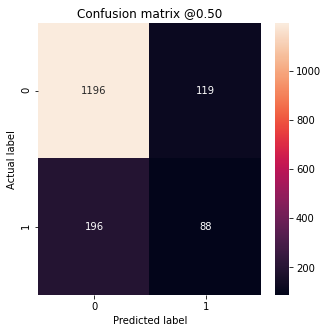

In [139]:
plot_cm(y_test, y_pred_prob)

#LR

In [140]:
from sklearn.linear_model import LogisticRegression #import

logreg = LogisticRegression(C=200)

In [141]:
%time logreg.fit(X_train_dtm, y_train)#train the model(timing it with an IPython "magic command")
predictions = logreg.predict(X_test_dtm)

CPU times: user 375 ms, sys: 4.05 ms, total: 379 ms
Wall time: 385 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [142]:
recall = rs(y_test,predictions)  
precision = ps(y_test,predictions)  
r1 = fs(y_test,predictions)
score = acc(y_test,predictions)
print('Recall Score: ',recall)  
print('Precision Score: ',precision)  
print('F1 Score: ',r1) 
print('Accuracy:',score)

Recall Score:  0.27816901408450706
Precision Score:  0.2893772893772894
F1 Score:  0.2836624775583483
Accuracy: 0.7504690431519699


In [143]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity: ',sensitivity)
print('Specificity: ',specificity)
print(tp)
print(fp)

Sensitivity:  0.27816901408450706
Specificity:  0.8524714828897338
79
194


In [144]:
from sklearn.metrics import roc_auc_score
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", roc_auc_score(y_test, y_pred_prob))

ROC_AOC_Score:  0.7313340116746105


In [145]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

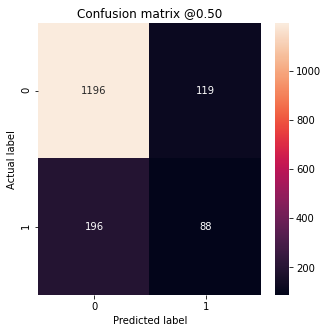

In [146]:
plot_cm(y_test, y_pred_prob)